In [1]:
from google.colab import drive
drive.mount("/content/drive")
 
#https://www.youtube.com/watch?v=bNntsCOdFxg

Mounted at /content/drive


In [5]:
train_file = "/content/drive/My Drive/Colab Notebooks/train.zip"

In [4]:
train_file = "/content/drive/My Drive/train.zip"

#For alex to run :)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import zipfile

with zipfile.ZipFile(train_file, 'r') as z:
  z.extractall()

0. Loading in the Data


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

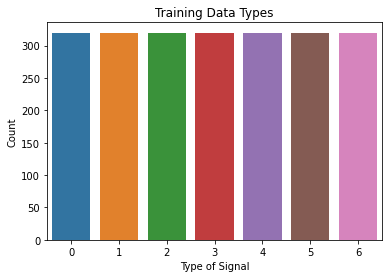

In [9]:
import os
import cv2
 
# Load the Image Data
def load_image(file_path):
  return cv2.imread(file_path)
 
# Define Labels from the data
def extract_label(file_name):
  if "4G_LTE_Uplink" in file_name:
     return 0
  elif "4G_LTE_Downlink" in file_name: 
    return 1 
  elif "5G_Downlink" in file_name: 
    return 2
  elif "5G_Uplink" in file_name: 
    return 3
  elif "WLAN_802.11b_g" in file_name:
    return 4
  elif "WLAN_802.11n_ac" in file_name:
    return 5
  elif "WLAN_802.11a_g_j" in file_name:
    return 6
 
 
class_names = ["4G_LTE_Uplink", "4G_LTE_Downlink", "5G_Downlink","5G_Uplink","WLAN_802.11b_g","WLAN_802.11n_ac","WLAN_802.11a_g_j"]
#class_names = ["4G_LTE_Uplink", "4G_LTE_Downlink", "5G_Downlink","5G_Uplink","WLAN" ]
train_path = "./train/"
image_files = os.listdir(train_path)
train_images = [load_image(train_path + file) for file in image_files]
train_labels = [extract_label(file) for file in image_files]
 
# Plot the count of each of the different labels
import seaborn as sns
import matplotlib.pyplot as plt
 
plt.figure()
sns.countplot(train_labels);
plt.title('Training Data Types')
plt.xlabel('Type of Signal')
plt.ylabel('Count')

1. Pre Process the Data

In [10]:
# Pre process the image to make them the same size and convert the images to greyscale
def preprocess_image(img, side = 500): # This side size will change, -> not really important tho becuase all imagees are of the same size
  min_side = min(img.shape[0], img.shape[1])
  img = img[:min_side, :min_side]
  img = cv2.resize(img, (side,side))
  #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  #return img / 255.0
  return img

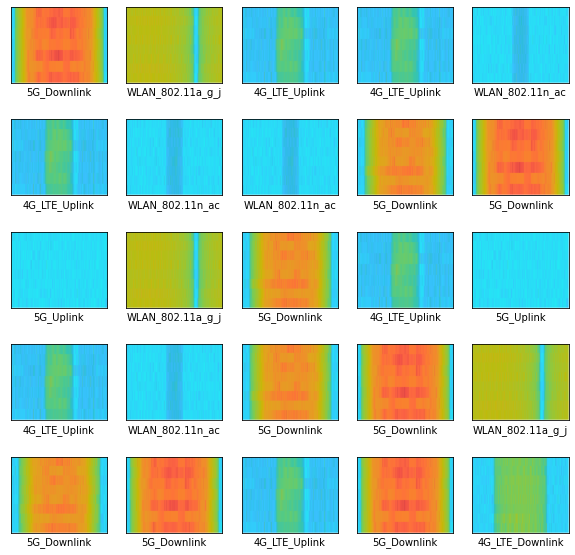

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
#preview_index = 150
#plt.subplot(1,2,1)
#plt.imshow(train_images[preview_index])
#plt.subplot(1,2,2)
#plt.imshow(preprocess_image(train_images[preview_index]), cmap="gray")


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]-1])
plt.show()

In [12]:
for i in range(len(train_images)):
  train_images[i]= preprocess_image(train_images[i])

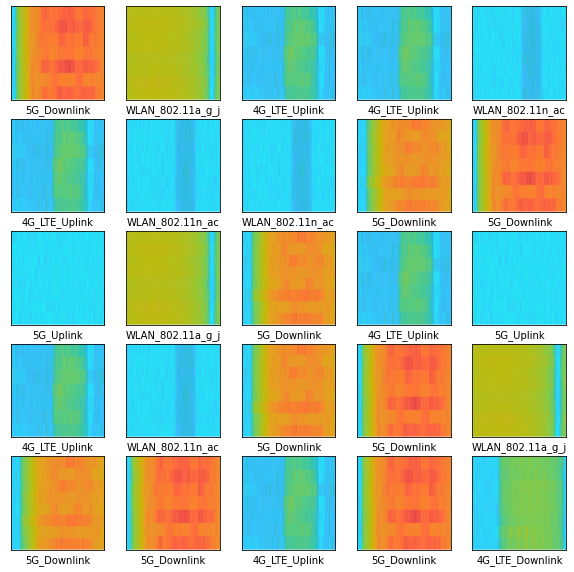

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]-1])
plt.show()

2. Flatten the Image for the convolutional Neural Network

In [ ]:
import numpy as np
#train_images = np.expand_dims(train_images, axis=-1)
train_images = np.array(train_images)
train_labels = np.array(train_labels)
print(train_images.shape, train_labels.shape)
#print(train_labels)

(280, 500, 500, 3) (280,)


3. Defining the Model

In [ ]:
# https://www.tensorflow.org/tutorials/images/cnn Another model to try
import tensorflow as tf
num_labels = 7
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(500, 500, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(num_labels))
model.summary()

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 498, 498, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 249, 249, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 247, 247, 64)      18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 123, 123, 64)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 121, 121, 64)      36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 937024)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

4. Training the Model

In [ ]:
trained = model.fit(train_images, train_labels, epochs = 10)
model.save_weights("model.tf")
test_loss, test_acc = model.evaluate(train_images,  train_labels, verbose=2)

print('\nTest accuracy:', test_acc)



Epoch 1/10
9/9 [==============================] - 2s 190ms/step - loss: 1745.6138 - accuracy: 0.2571
Epoch 2/10
9/9 [==============================] - 2s 183ms/step - loss: 36.5140 - accuracy: 0.5357
Epoch 3/10
9/9 [==============================] - 2s 183ms/step - loss: 2.0284 - accuracy: 0.5857
Epoch 4/10
9/9 [==============================] - 2s 184ms/step - loss: 1.1972 - accuracy: 0.8179
Epoch 5/10
9/9 [==============================] - 2s 184ms/step - loss: 6.3581 - accuracy: 0.5750
Epoch 6/10
9/9 [==============================] - 2s 182ms/step - loss: 1.1782 - accuracy: 0.6893
Epoch 7/10
9/9 [==============================] - 2s 180ms/step - loss: 0.8942 - accuracy: 0.6821
Epoch 8/10
9/9 [==============================] - 2s 183ms/step - loss: 0.5468 - accuracy: 0.7321
Epoch 9/10
9/9 [==============================] - 2s 183ms/step - loss: 0.5145 - accuracy: 0.8036
Epoch 10/10
9/9 [==============================] - 2s 184ms/step - loss: 0.3852 - accuracy: 0.8750
9/9 - 0s - loss

{'loss': [1745.61376953125, 36.51401901245117, 2.028398036956787, 1.1971572637557983, 6.358115196228027, 1.178231120109558, 0.8941956758499146, 0.5467888712882996, 0.514508068561554, 0.3852081000804901], 'accuracy': [0.2571428716182709, 0.5357142686843872, 0.5857142806053162, 0.8178571462631226, 0.574999988079071, 0.6892856955528259, 0.6821428537368774, 0.7321428656578064, 0.8035714030265808, 0.875]}


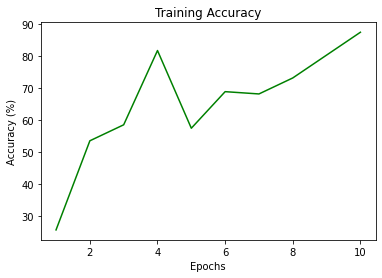

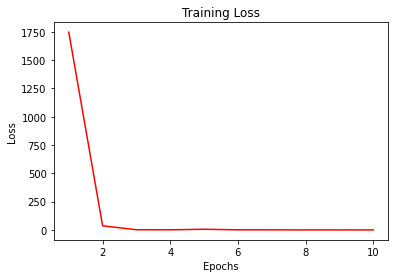

In [ ]:

#tf.keras.callbacks.Callback().params['loss']
print(trained.history)

#import matplotlib.pyplot as plt
loss = trained.history['loss']
accuracyPercent = []
accuracy = trained.history['accuracy'] 
for value in accuracy:
  accuracyPercent.append(value * 100)
epochs = range(1, len(loss) + 1)
plt.plot(epochs, accuracyPercent, color='green', label='Validation loss')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.show()


plt.plot(epochs, loss, color='red', label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

5. Make Predictions

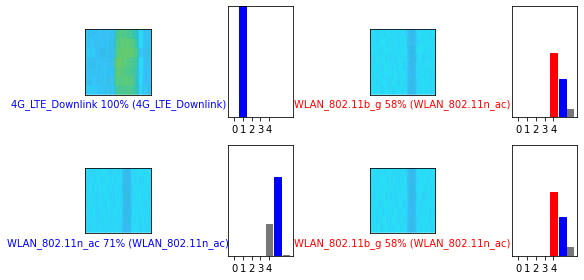

In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

## Test images need to be new, currently only giving the training -> just need to get more signals genereated
test_images = train_images
test_labels = train_labels
# Give an array of unseen test values and make a prediction
predictions = probability_model.predict(train_images)

# Each image has a prediction -> prediction 1 is found at:
predictions[2]

## PLot them

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(5))
  plt.yticks([])
  thisplot = plt.bar(range(7), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 2
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
